# Read txt files



In [84]:
import csv
import time
import json

def create_csv(citationNetworkFile):
    with open(citationNetworkFile, 'w') as f:
        csv_write = csv.writer(f)
        csv_head = ['source','target']
        csv_write.writerow(csv_head)
        
def write_csv(path, source, target):
    with open(path,'a+') as f:
        csv_write = csv.writer(f)
        data_row = [source,target]
        csv_write.writerow(data_row)
        
        
filePath = '/Users/zhouyang/Downloads/dblp_papers_v11.txt'

# Generate Collaboration Network for each Year

* [ ] Change the directory path if you want to reproduce

In [ ]:
time_begin = time.time()

directoryPath = '/Users/zhouyang/Downloads/Complex Network/AuthorNetworkByYear_5Authors/'



filePathByYear = []
csv_writerSet = []

for year in range(1946,2019):
    create_csv(directoryPath + str(year) + '.csv')
    filePathByYear.append(directoryPath + str(year) + '.csv')



count = 0

with open(filePath) as f:
    for line in f:
        jsonContent = json.dumps(eval(line), sort_keys=True, indent=4, separators=(',', ': '))
        paperData = json.loads(jsonContent)
        num = len(paperData['authors'])
        # number of authos
        if (num > 5):
            continue
        
        if ('year' in paperData):
            paperYear = paperData['year']
            # get year
            for item1 in paperData['authors']:
                for item2 in paperData['authors']:
                    if (item1['id'] == item2['id']):
                        continue
                    write_csv(directoryPath + str(paperYear) + '.csv', item1['id'], item2['id'])
        count += 1
        
        if (count % 100000 == 0):
            print(count)
            print('time cost: ', time.time() - time_begin)

# Count the percentage of papers with different numbers of authors

In [ ]:
time_begin = time.time()

count = 0
year_Num = np.zeros((100,100))


with open(filePath) as f:
    for line in f:
        jsonContent = json.dumps(eval(line), sort_keys=True, indent=4, separators=(',', ': '))
        paperData = json.loads(jsonContent)
        num = len(paperData['authors'])
        if ('year' in paperData):
            paperYear = paperData['year']
            authorNum = len(paperData['authors'])
            if ((authorNum > 88) or (paperYear > 2018) or (paperYear < 1946)):
                continue
            year_Num[paperData['year'] - 1946][authorNum] += 1

        count = count + 1
        if (count % 100000 == 0):
            print(count)
            time_end = time.time()
            print("time cost: ", (time_end - time_begin))

In [122]:
def create_csv(citationNetworkFile):
    with open(citationNetworkFile, 'w') as f:
        csv_write = csv.writer(f)
        csv_head = ['source','target']
        csv_write.writerow(csv_head)
        
def write_csv(source, target):
    path  = "/Users/zhouyang/Downloads/citationNetwork.csv"
    with open(path,'a+') as f:
        csv_write = csv.writer(f)
        data_row = [source,target]
        csv_write.writerow(data_row)


statisticFilePath = '/Users/zhouyang/Downloads/Complex Network/statisticFilePath.csv'
with open(statisticFilePath, 'a+') as f:
    csv_write = csv.writer(f)
    for item in year_Num:
        csv_write.writerow(item)

# Deduplicate in CSV files

```python
csv_deduplicate_single_file(csvFilePath) 给定csv文件的路径，去重复边并保存在同一路径
csv_decuplicate_single_file(directory) 给定目录路径，去该目录下所有csv文件中的重复边并保存在对应的原有路径

```


In [2]:
import os

def csv_deduplicate_single_file(csvFilePath):
    authorSet = set()
    
    with open(csvFilePath) as f:
        for line in f:
            data = line.split(',')
            forward = data[0] + ' ' + data[1].strip()
            backward = data[1].strip() + ' ' + data[0]
            if ((forward in authorSet) or (backward in authorSet) ):
                continue
            authorSet.add(forward)
        
    with open(csvFilePath, 'w') as f:
        csv_write = csv.writer(f)
        for item in authorSet:
            temp_data = item.split(' ')
            csv_write.writerow([temp_data[0], temp_data[1]])


def csv_decuplicate_single_file(directory):
    for file in os.listdir(directory):
        if (file.split('.')[-1] == 'csv'):
            csv_deduplicate_single_file(directory + '/' + file)
        else:
            continue
            

            
def csv_map_order(directory):
    for file in os.listdir(directory):
        if (file.split('.')[-1] == 'csv'):
            csv_single_file_path = directory + '/' + file
            authorSet = set()
    
            with open(csv_single_file_path) as f:
                for line in f:
                    data = line.split(',')
                    forward = data[0] + ' ' + data[1].strip()
                    backward = data[1].strip() + ' ' + data[0]
                    if ((forward in authorSet) or (backward in authorSet) ):
                        continue
                    authorSet.add(forward)

            with open(csv_single_file_path, 'w') as f:
                csv_write = csv.writer(f)
                csv_write.writerow(['source', 'target'])
                for item in authorSet:
                    temp_data = item.split(' ')
                    if (temp_data[0] == 'source'):
                        continue
                    csv_write.writerow([temp_data[0], temp_data[1]])
        else:
            continue
    
# csv_map_order('/Users/zhouyang/Downloads/Complex Network/AuthorNetworkByYear')

# NetworkX

## Use NetworkX to compute degree distribution

* [x] 同一张图展示多组数据
* [x] 处理为0的数据
* [x] 实现线性回归
* [x] 不展示后面0很多的部分
* [x] 忽略为0的点
* [x] 画出斜率变化的趋势
* [x] 将三组斜率的变化趋势展示在同一张图中
* [x] 改变x-y轴的Label

In [81]:
import networkx
import matplotlib.pyplot as plt
from math import log
from math import pow
from sklearn import linear_model

def get_degree_distribution(CSVFilePath):
    G = networkx.Graph()
    
    f = open(CSVFilePath, 'r+')
    next(f)
    # Jump over the first line.
    
    
    for item in f:
        edgeData = item.split(',')
        G.add_edge(edgeData[0], edgeData[1].strip())
            

    degree_distribution = networkx.degree_histogram(G)
    number_of_nodes = G.number_of_nodes()
    
    return [x / number_of_nodes for x in degree_distribution]


def get_log_degree_distribution(CSVFilePath):
    
    degree_distribution = get_degree_distribution(CSVFilePath)
#     return [log(x) for x in degree_distribution]
    
    
    G = networkx.Graph()
    
    f = open(CSVFilePath, 'r+')
    next(f)
    # Jump over the first line.
    
    
    for item in f:
        edgeData = item.split(',')
        G.add_edge(edgeData[0], edgeData[1].strip())
            

    degree_distribution = networkx.degree_histogram(G)
    log_degree_distribution = []
    for i in degree_distribution[1:]:
        if (i == 0):
            log_degree_distribution.append(0)
            continue
        
        log_degree_distribution.append(log(i))
    
    
    
    return log_degree_distribution

def plot_log_degree_distribution(log_degree_distribution, year):
    x = []
    y = []
    for i in log_degree_distribution:
        if (i == 0):
            continue
#         if (log_degree_distribution.index(i) > 20):
#             break
        x.append([log_degree_distribution.index(i) + 1])
        y.append([i])
        
    model = linear_model.LinearRegression()
    model.fit(x,y)
    print(len(x))

    
    y2 = model.predict(x)
    
    plt.scatter(range(len(log_degree_distribution)), log_degree_distribution, marker = '.')
    plt.plot(x, y2, label = str(year))


def get_power_law_slope(log_degree_distribution):
    x = []
    y = []
    
    for i in log_degree_distribution:
        if (i == 0):
            continue
        x.append([log_degree_distribution.index(i) + 1])
        y.append([i])
        
    model = linear_model.LinearRegression()
    model.fit(x,y)
    
    
    return model.coef_[0][0]

def plot_three_slope_in_one():
    # 
    directory = './Network Data/authors'
    
    slope = [[], [], []]
    for j in range(3):
        for i in range(1975,2018):
            filePath = directory + '_' + str(j + 3) + '/' + str(i) + '.csv'
            slope[j].append(get_power_law_slope(get_log_degree_distribution(filePath)))
    
    plt.figure(dpi=500)
    
    
    plt.plot(range(1975,2018), slope[0], label = 'Authors <= 3', marker = 'x')
    plt.plot(range(1975,2018), slope[1], label = 'Authors <= 4', marker = '.')
    plt.plot(range(1975,2018), slope[2], label = 'Authors <= 5', marker = '*')
    plt.xlim(1960,2020)
    plt.xlabel('Year')
    plt.ylabel('Slope of Power Law')
    plt.title('')
    plt.legend()
    
    return slope

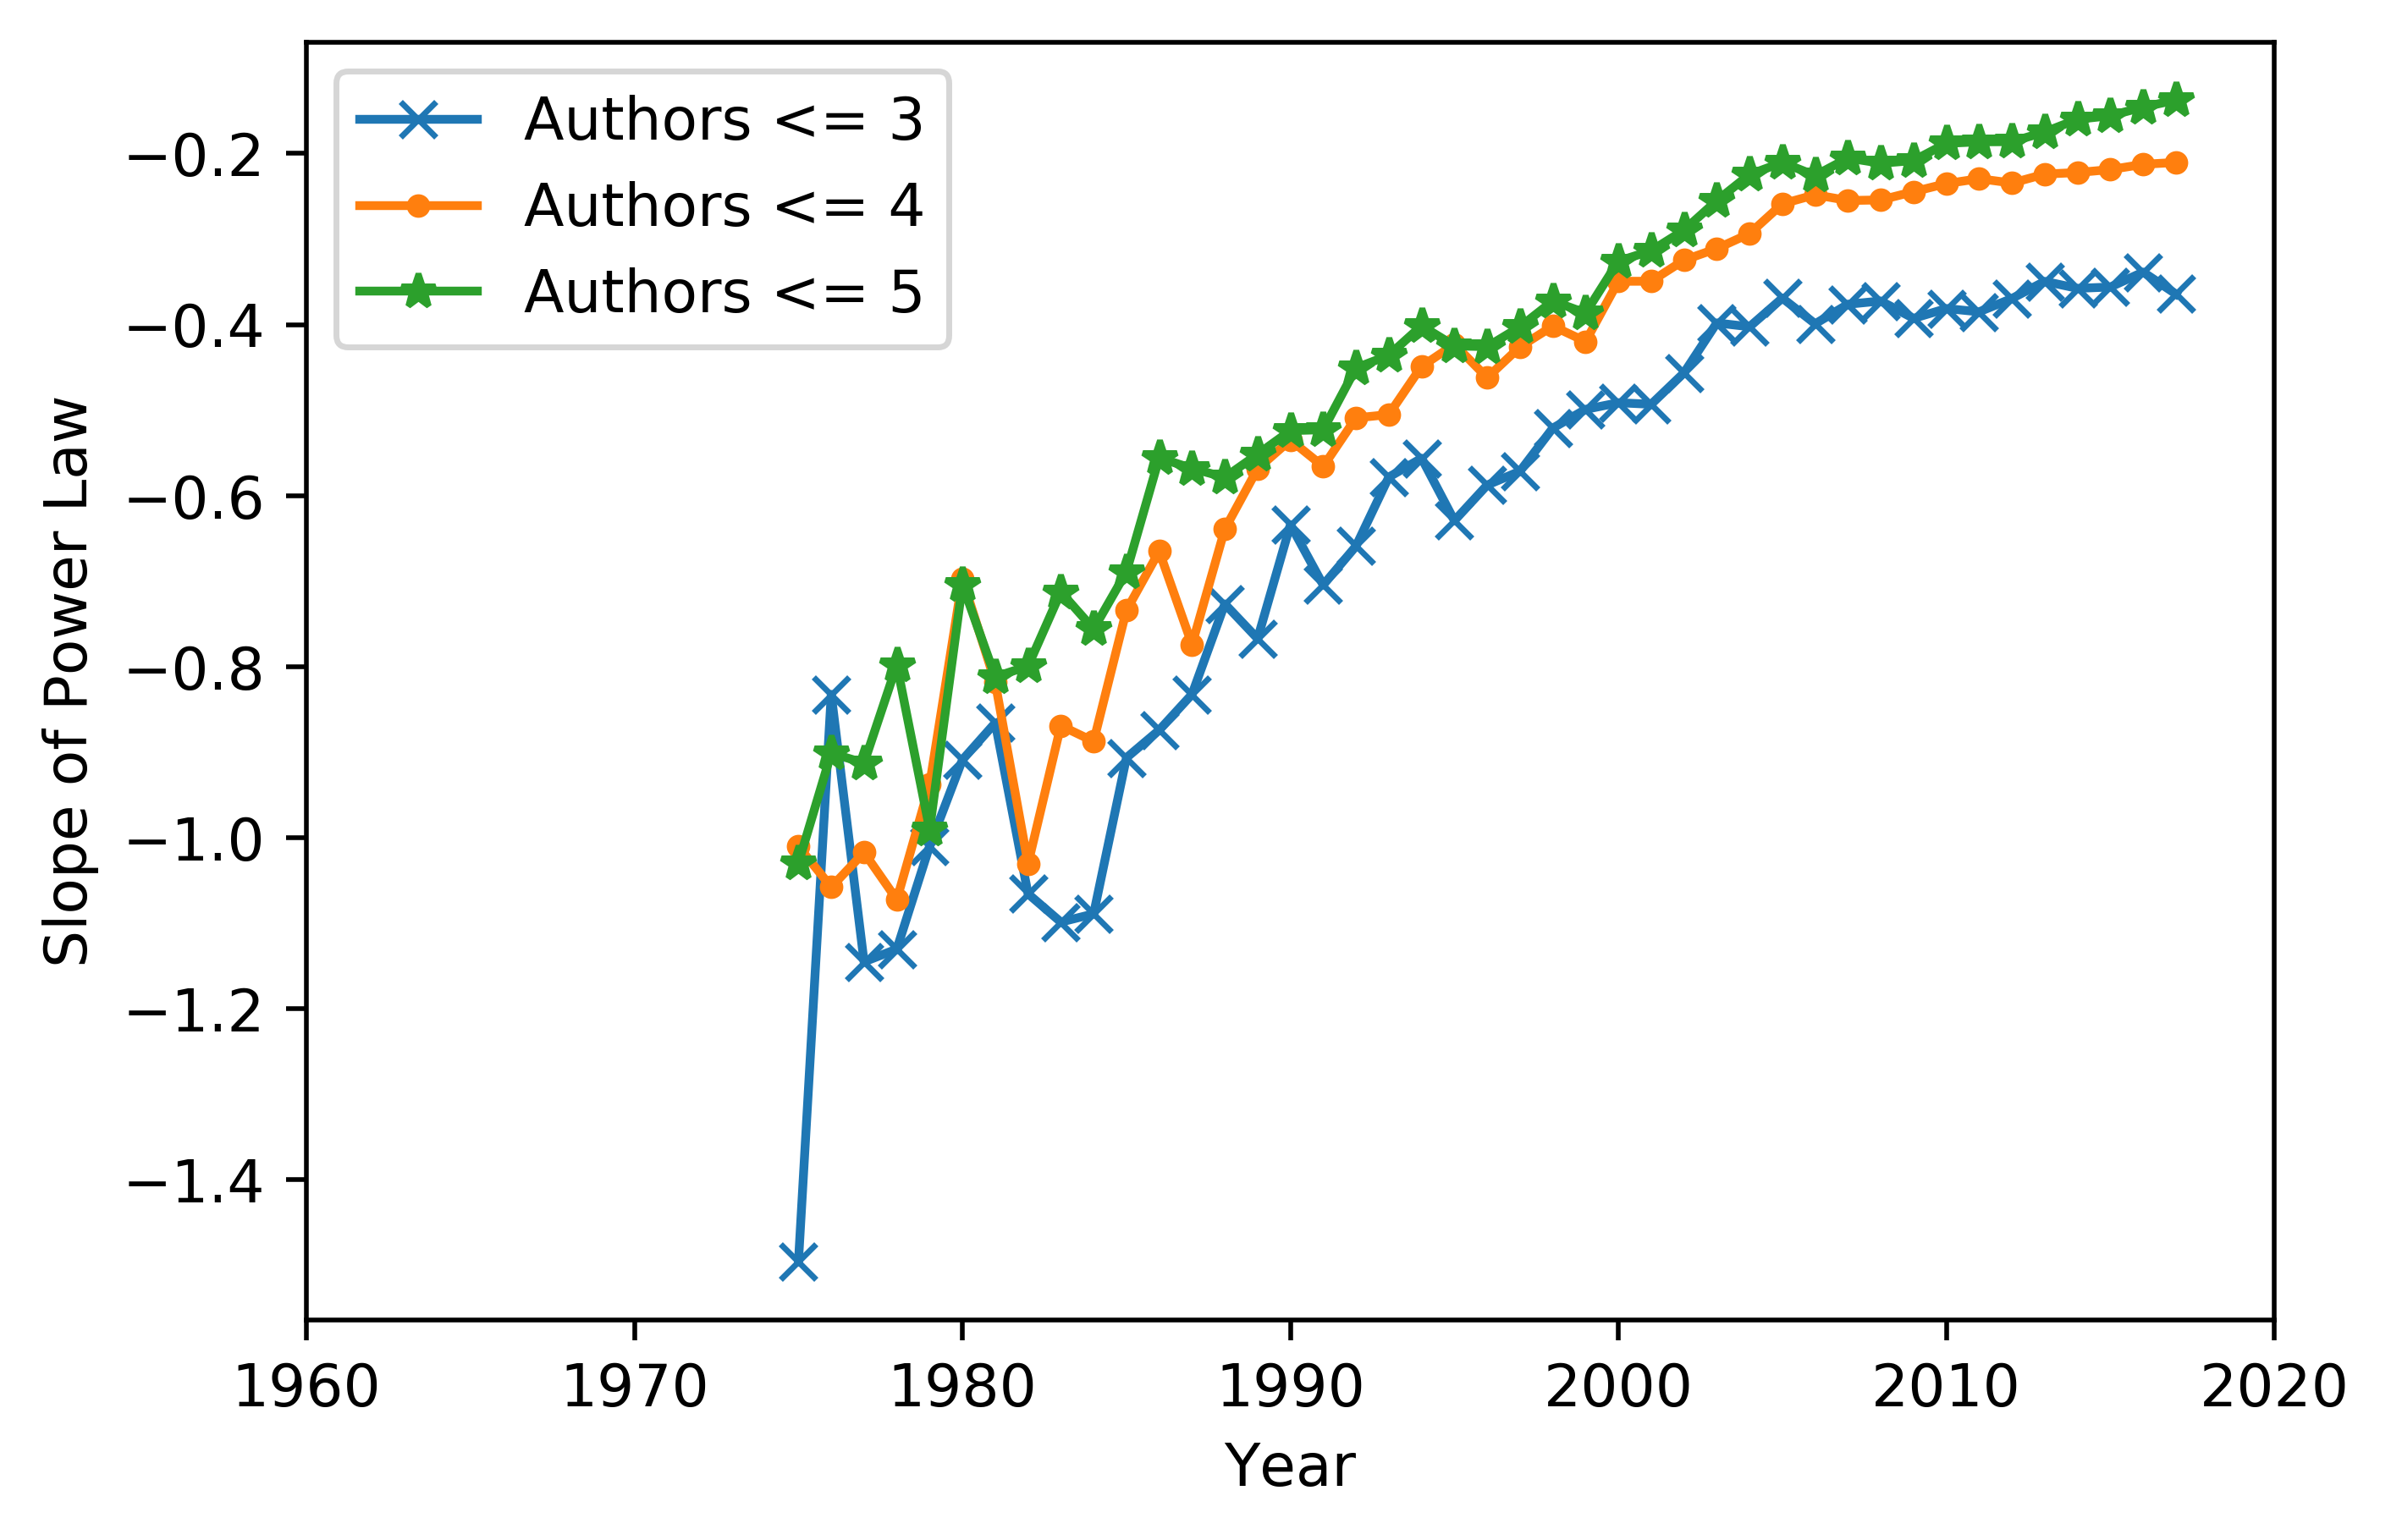

In [82]:
slope = plot_three_slope_in_one()

11
16
23
34
57
73


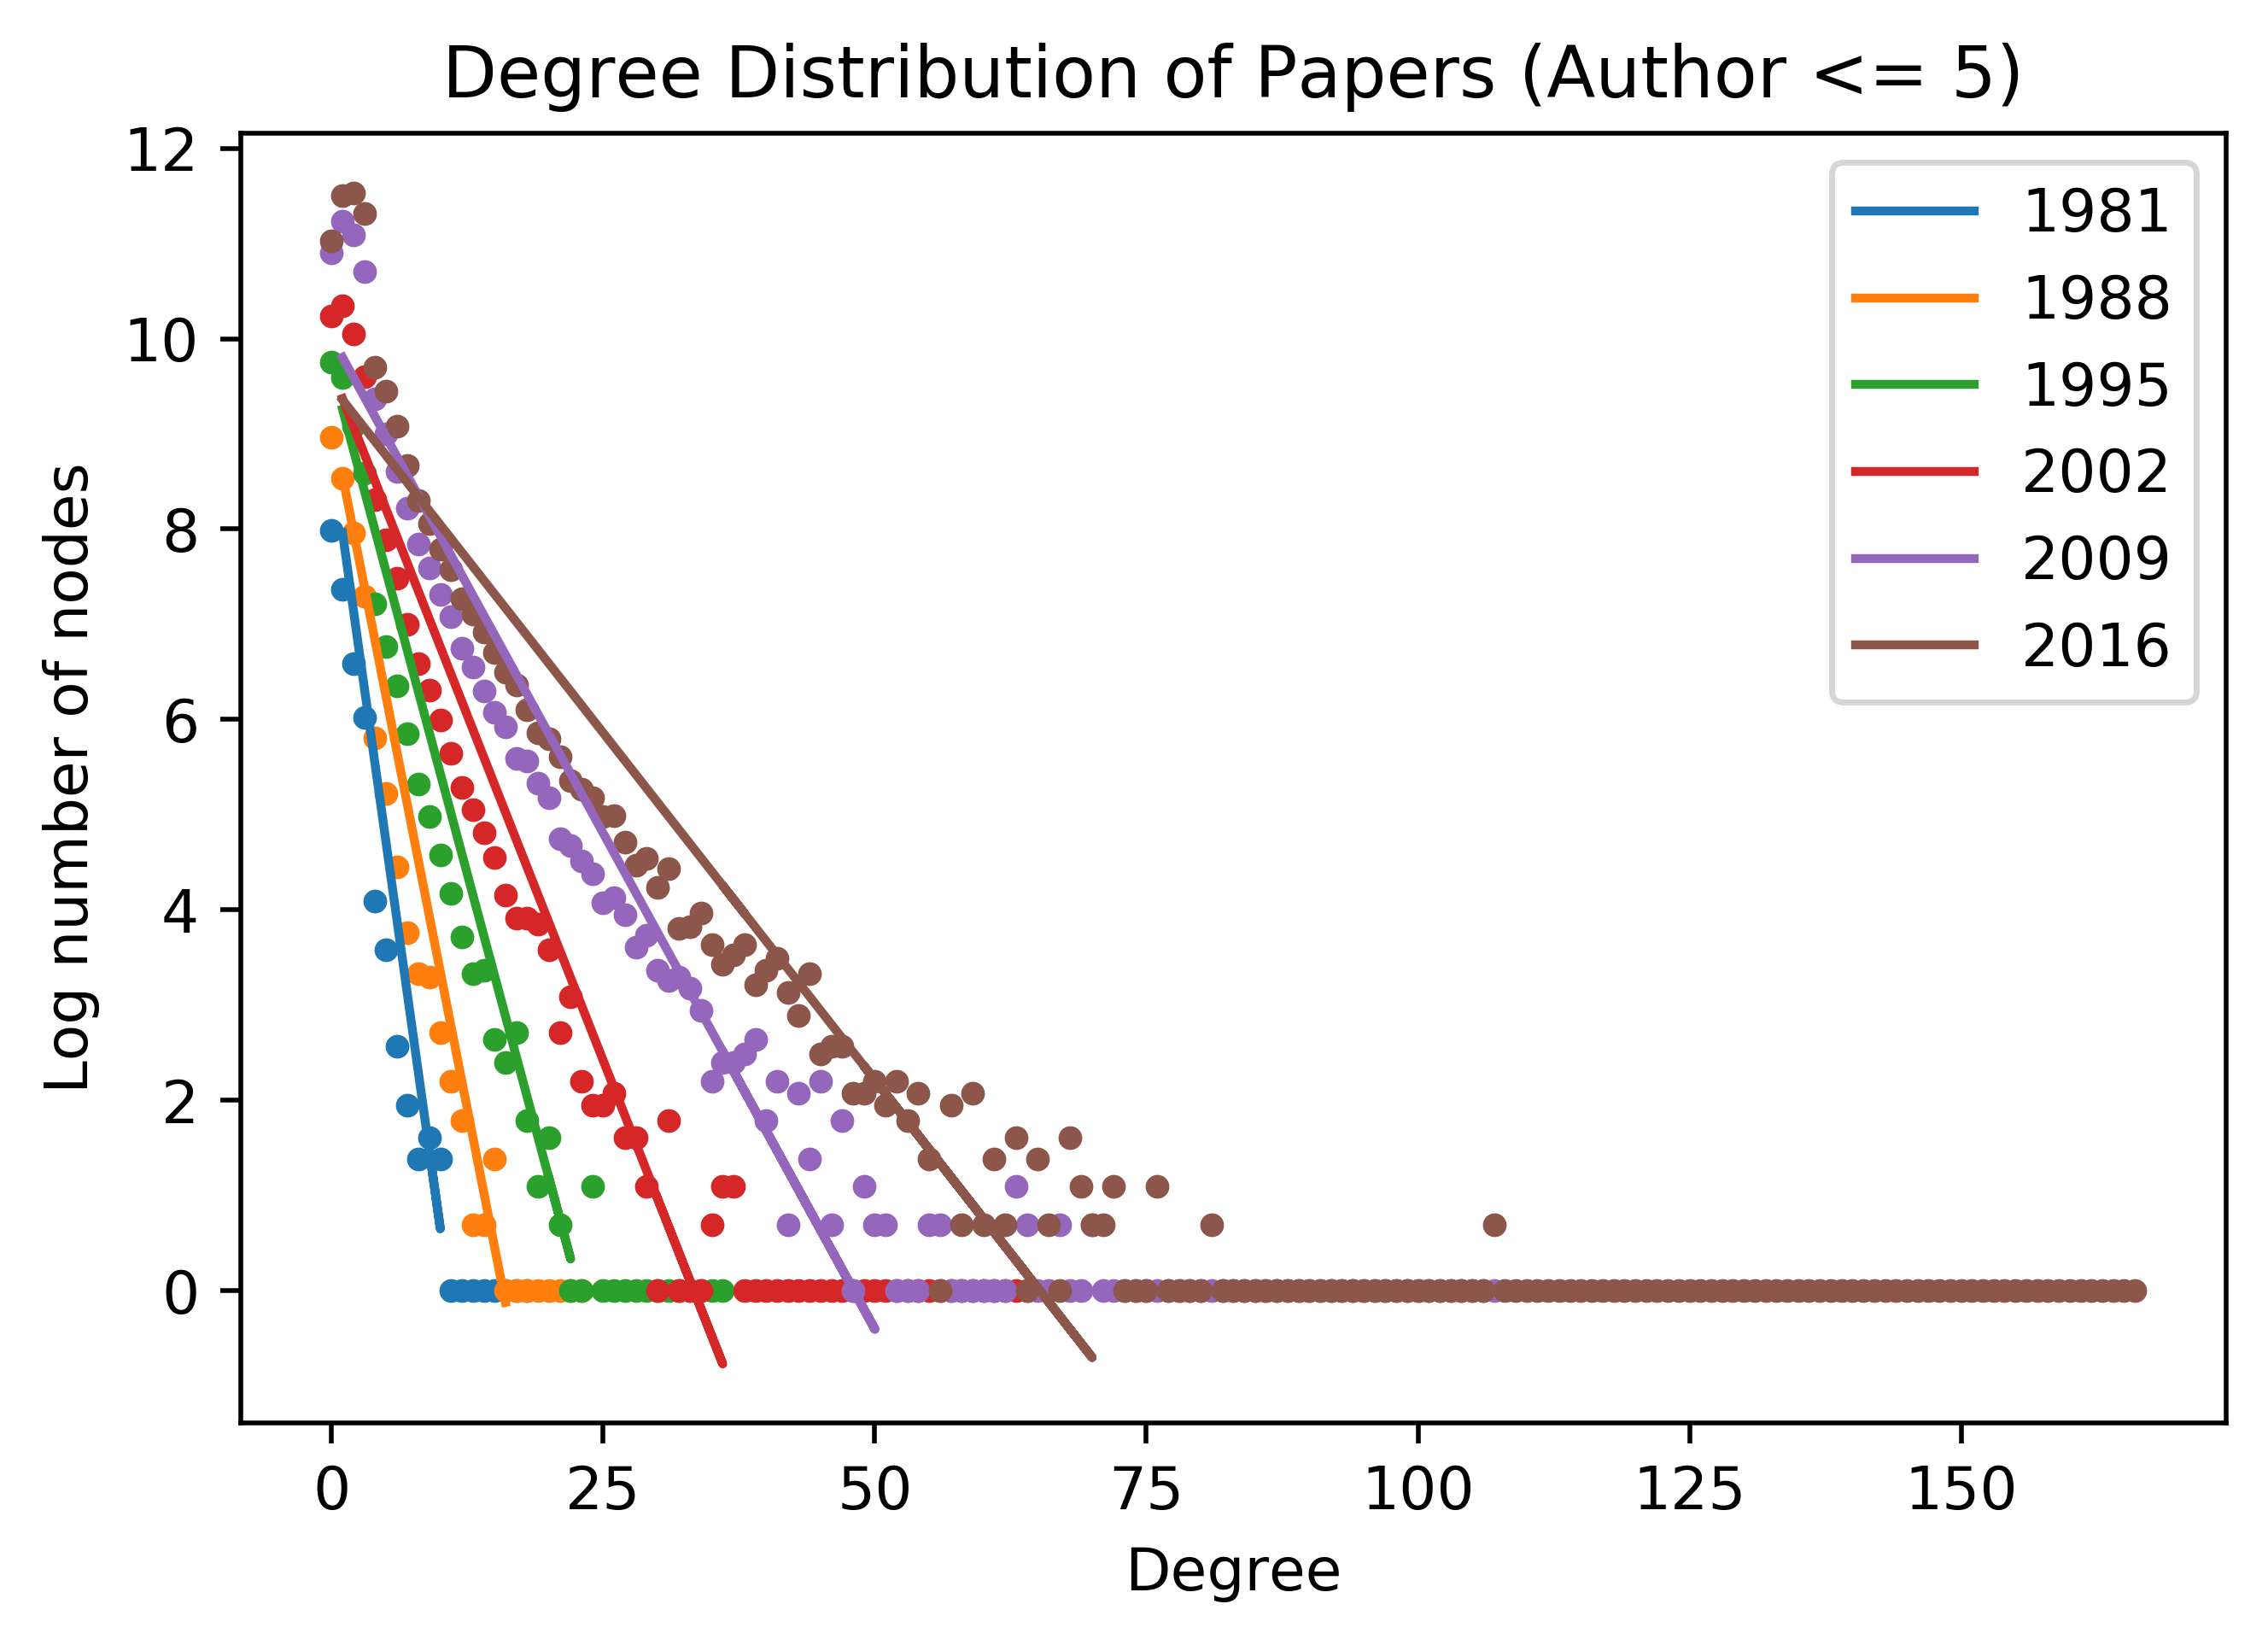

In [43]:
directory = './Network Data/authors'
plt.figure(dpi=500)
# plt.xlim(0, 40)
plt.title('Degree Distribution of Papers (Author <= 5)')
plt.xlabel('Degree')
plt.ylabel('Log number of nodes')

for year in range(1975,2018):
    if (year % 7):
        continue
    filePath = directory + '_' + str(5) + '/' + str(year) + '.csv'
    get_log_degree_distribution(filePath)
    plot_log_degree_distribution(get_log_degree_distribution(filePath), year)
    plt.legend()

## NetworkX to compute clustering coefficient

The clustering coefficient $C(p)$ is defined as follows. Suppose that a vertex $v$ has kv neighbours; then at most kvðkv 21Þ=2 edges can exist between them (this occurs when every neighbourof v is connected to everyother neighbour of v). Let Cv denote the fraction of these allowable edges that actually exist.

Define C as the average of Cv over all v. For friendship networks, these statistics have intuitive meanings: L is the average number of friendships in the shortest chain connecting two people;

Cv reflects the extent to which friends of v are also friends of each other; and thus C measures the cliquishness of a typical
friendship circle. The data shown in the figure are averages over 20 random realizations of the rewiring process described in Fig.1, and have been normalized by the values L(0), C(0) for a regular lattice. All the graphs have n ¼ 1;000 vertices and an average degree of k ¼ 10 edges per vertex. We note that a logarithmic horizontal scale has been used to resolve the rapid drop in L(p), corresponding to the onset of the small-world phenomenon.

During this drop, C(p) remains almost constant at its value for the regular lattice, indicating that the transition to a small
world is almost undetectable at the local level .


In [66]:
def get_average_clustering_coefficient(CSVFilePath):
    G = networkx.Graph()
    
    f = open(CSVFilePath, 'r+')
    next(f)
    # Jump over the first line.
    
    
    for item in f:
        edgeData = item.split(',')
        G.add_edge(edgeData[0], edgeData[1].strip())
            

    return networkx.average_clustering(G,count_zeros=True)

In [67]:
data_directory = './Network Data/authors_3/'

average_clustering_coefficient_set_3 = []
for year in range(1975, 2018):
    file_path = data_directory + str(year) + '.csv'
    average_clustering_coefficient_set_3.append(get_average_clustering_coefficient(file_path))

In [68]:
data_directory = './Network Data/authors_4/'

average_clustering_coefficient_set_4 = []
for year in range(1975, 2018):
    file_path = data_directory + str(year) + '.csv'
    average_clustering_coefficient_set_4.append(get_average_clustering_coefficient(file_path))

In [69]:
data_directory = './Network Data/authors_5/'

average_clustering_coefficient_set_5 = []
for year in range(1975, 2018):
    file_path = data_directory + str(year) + '.csv'
    average_clustering_coefficient_set_5.append(get_average_clustering_coefficient(file_path))

Text(0.5, 1.0, 'Trends in Average Clustering Coefficient')

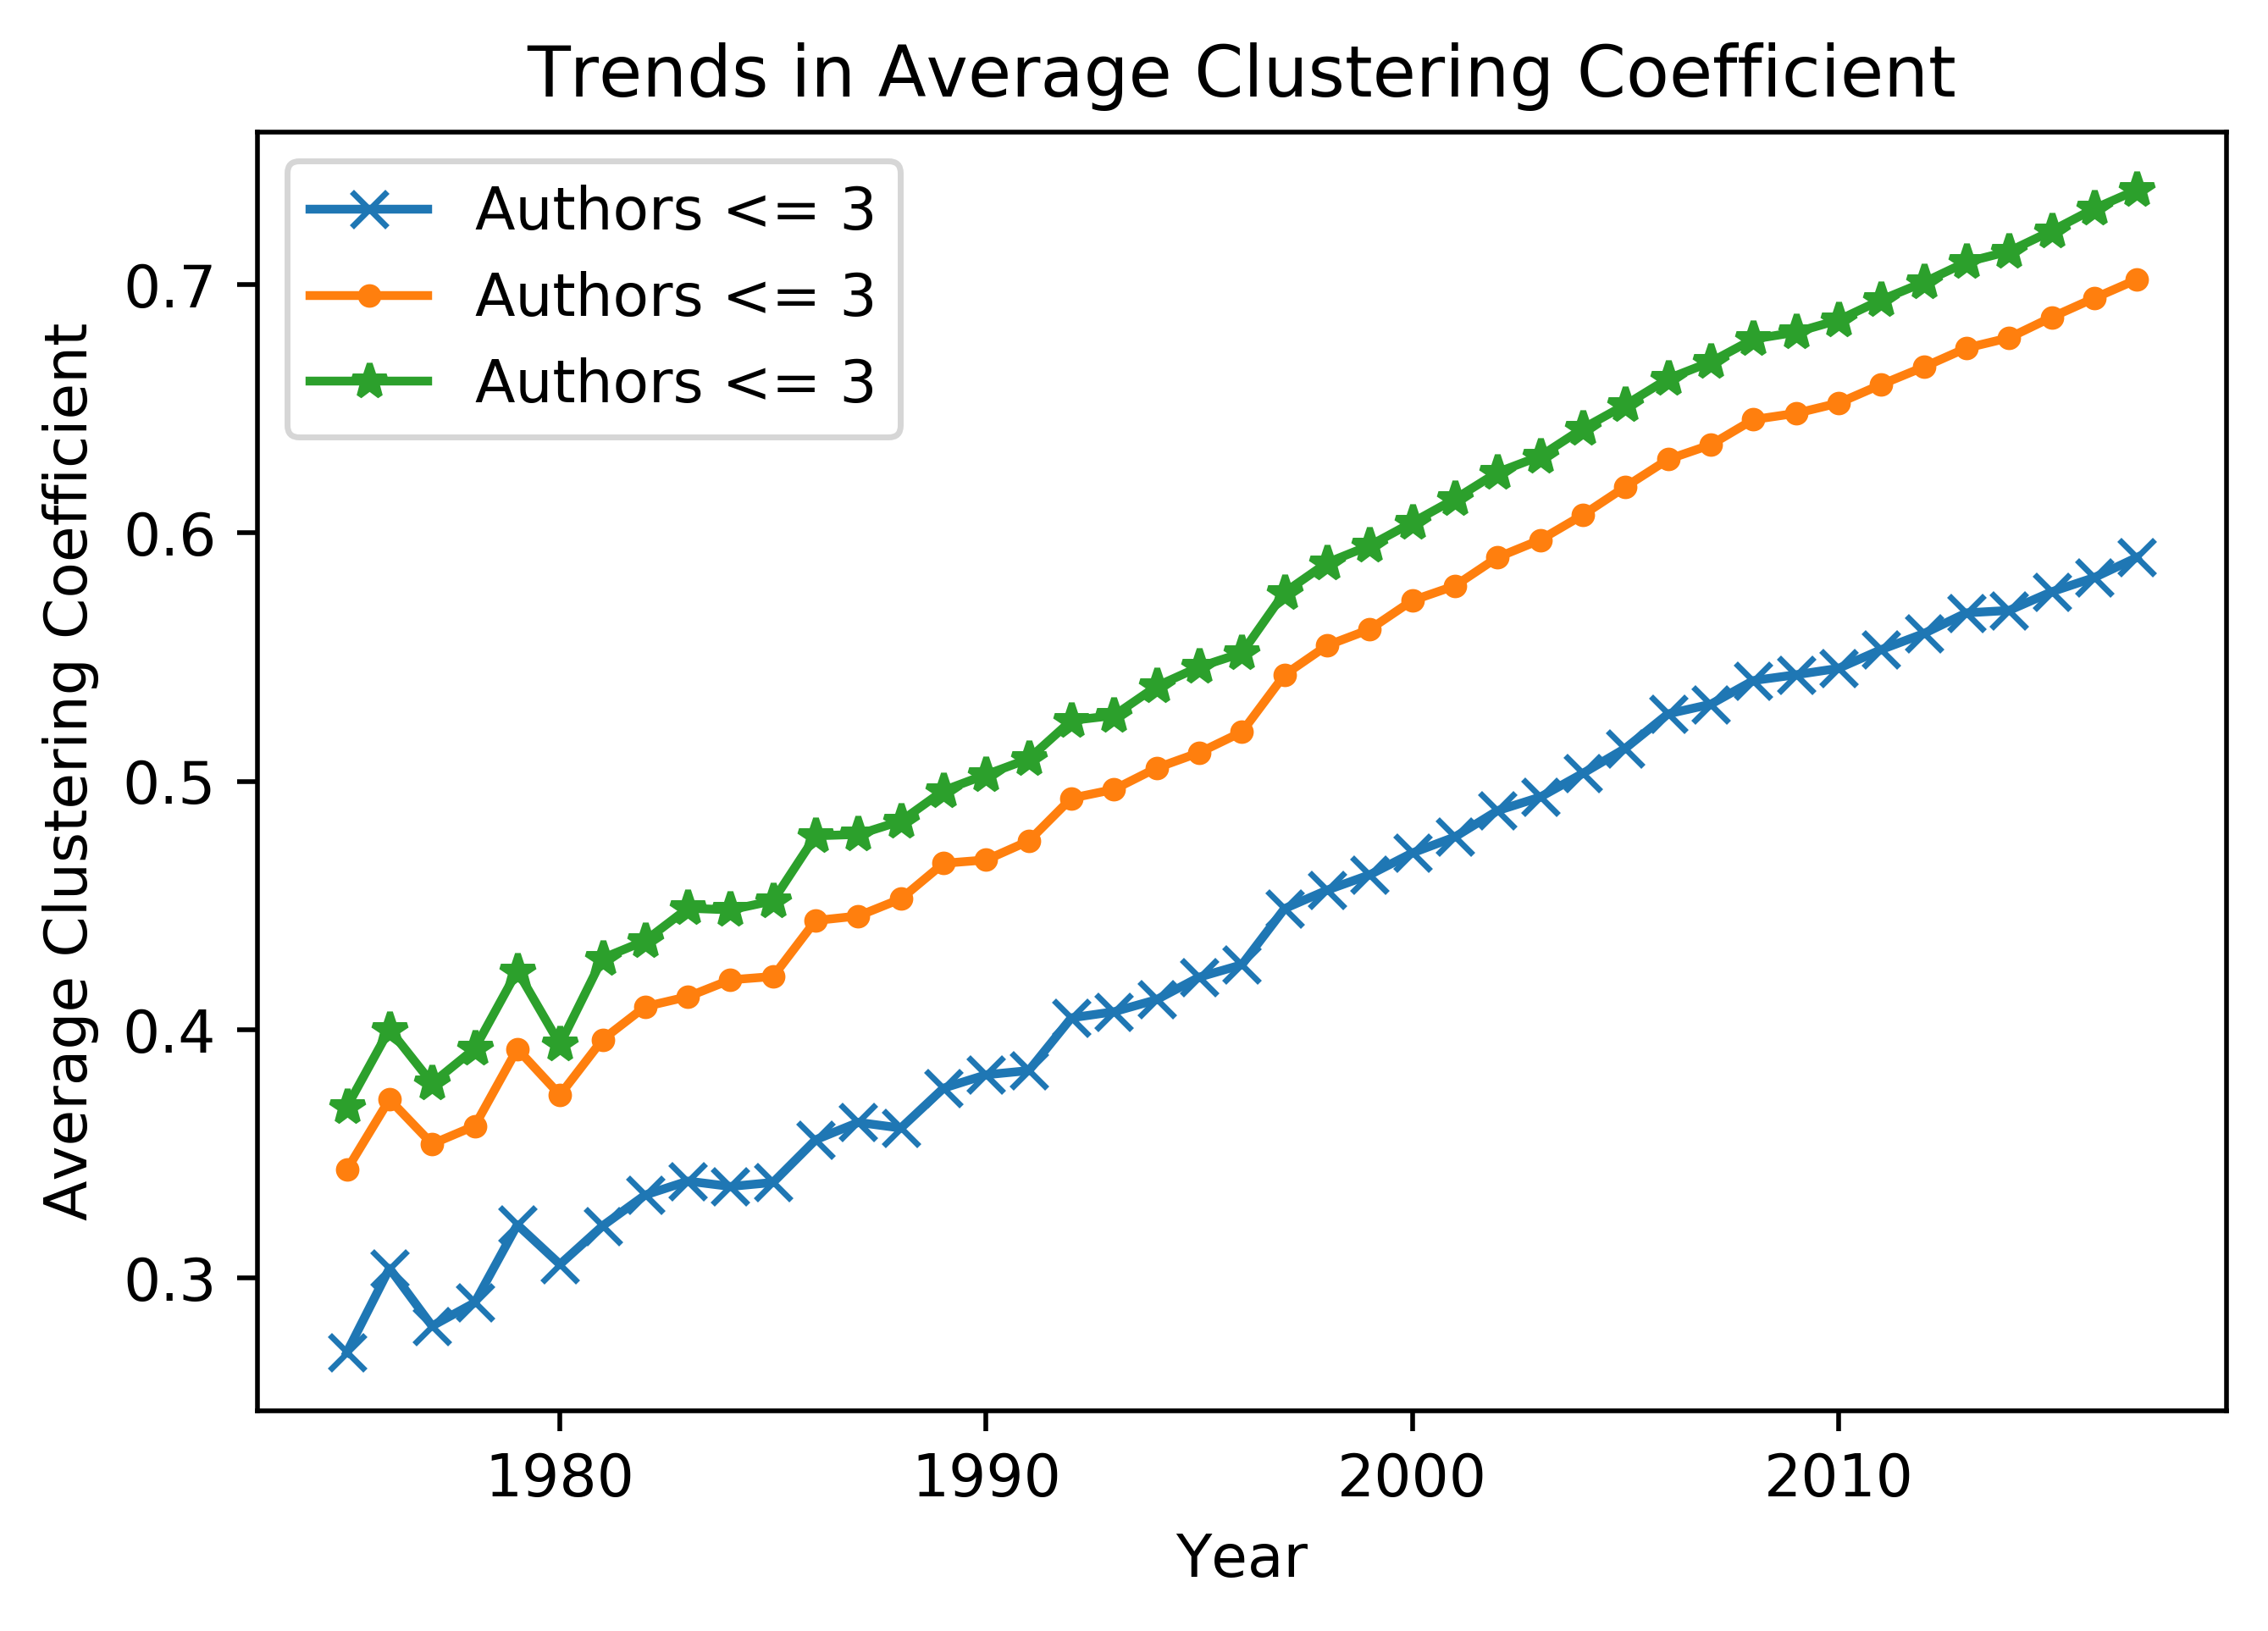

In [80]:
plt.figure(dpi=500)

plt.plot(range(1975, 2018), average_clustering_coefficient_set_3, label = 'Authors <= 3', marker = 'x')
plt.plot(range(1975, 2018), average_clustering_coefficient_set_4, label = 'Authors <= 3', marker= '.')
plt.plot(range(1975, 2018), average_clustering_coefficient_set_5, label = 'Authors <= 3', marker = '*')
plt.xlabel('Year')
plt.ylabel('Average Clustering Coefficient')
plt.legend()
plt.title('Trends in Average Clustering Coefficient')

## Compute Rich Club Coefficient

* [x] Rich Club Coefficient的解释
* [x] Rich Club Coefficient的可视化
* [ ] ~貌似按照年份对比不是很明显，横向对比呢，不同合作这数量的论文之间呢?~
* [x] 给他个Log

In [45]:
def get_rich_club_coefficient(CSVFilePath):
    G = networkx.Graph()
    
    f = open(CSVFilePath, 'r+')
    next(f)
    # Jump over the first line.
    
    
    for item in f:
        edgeData = item.split(',')
        G.add_edge(edgeData[0], edgeData[1].strip())
            

    return networkx.rich_club_coefficient(G, normalized=False)

time consumed:  28.227234840393066


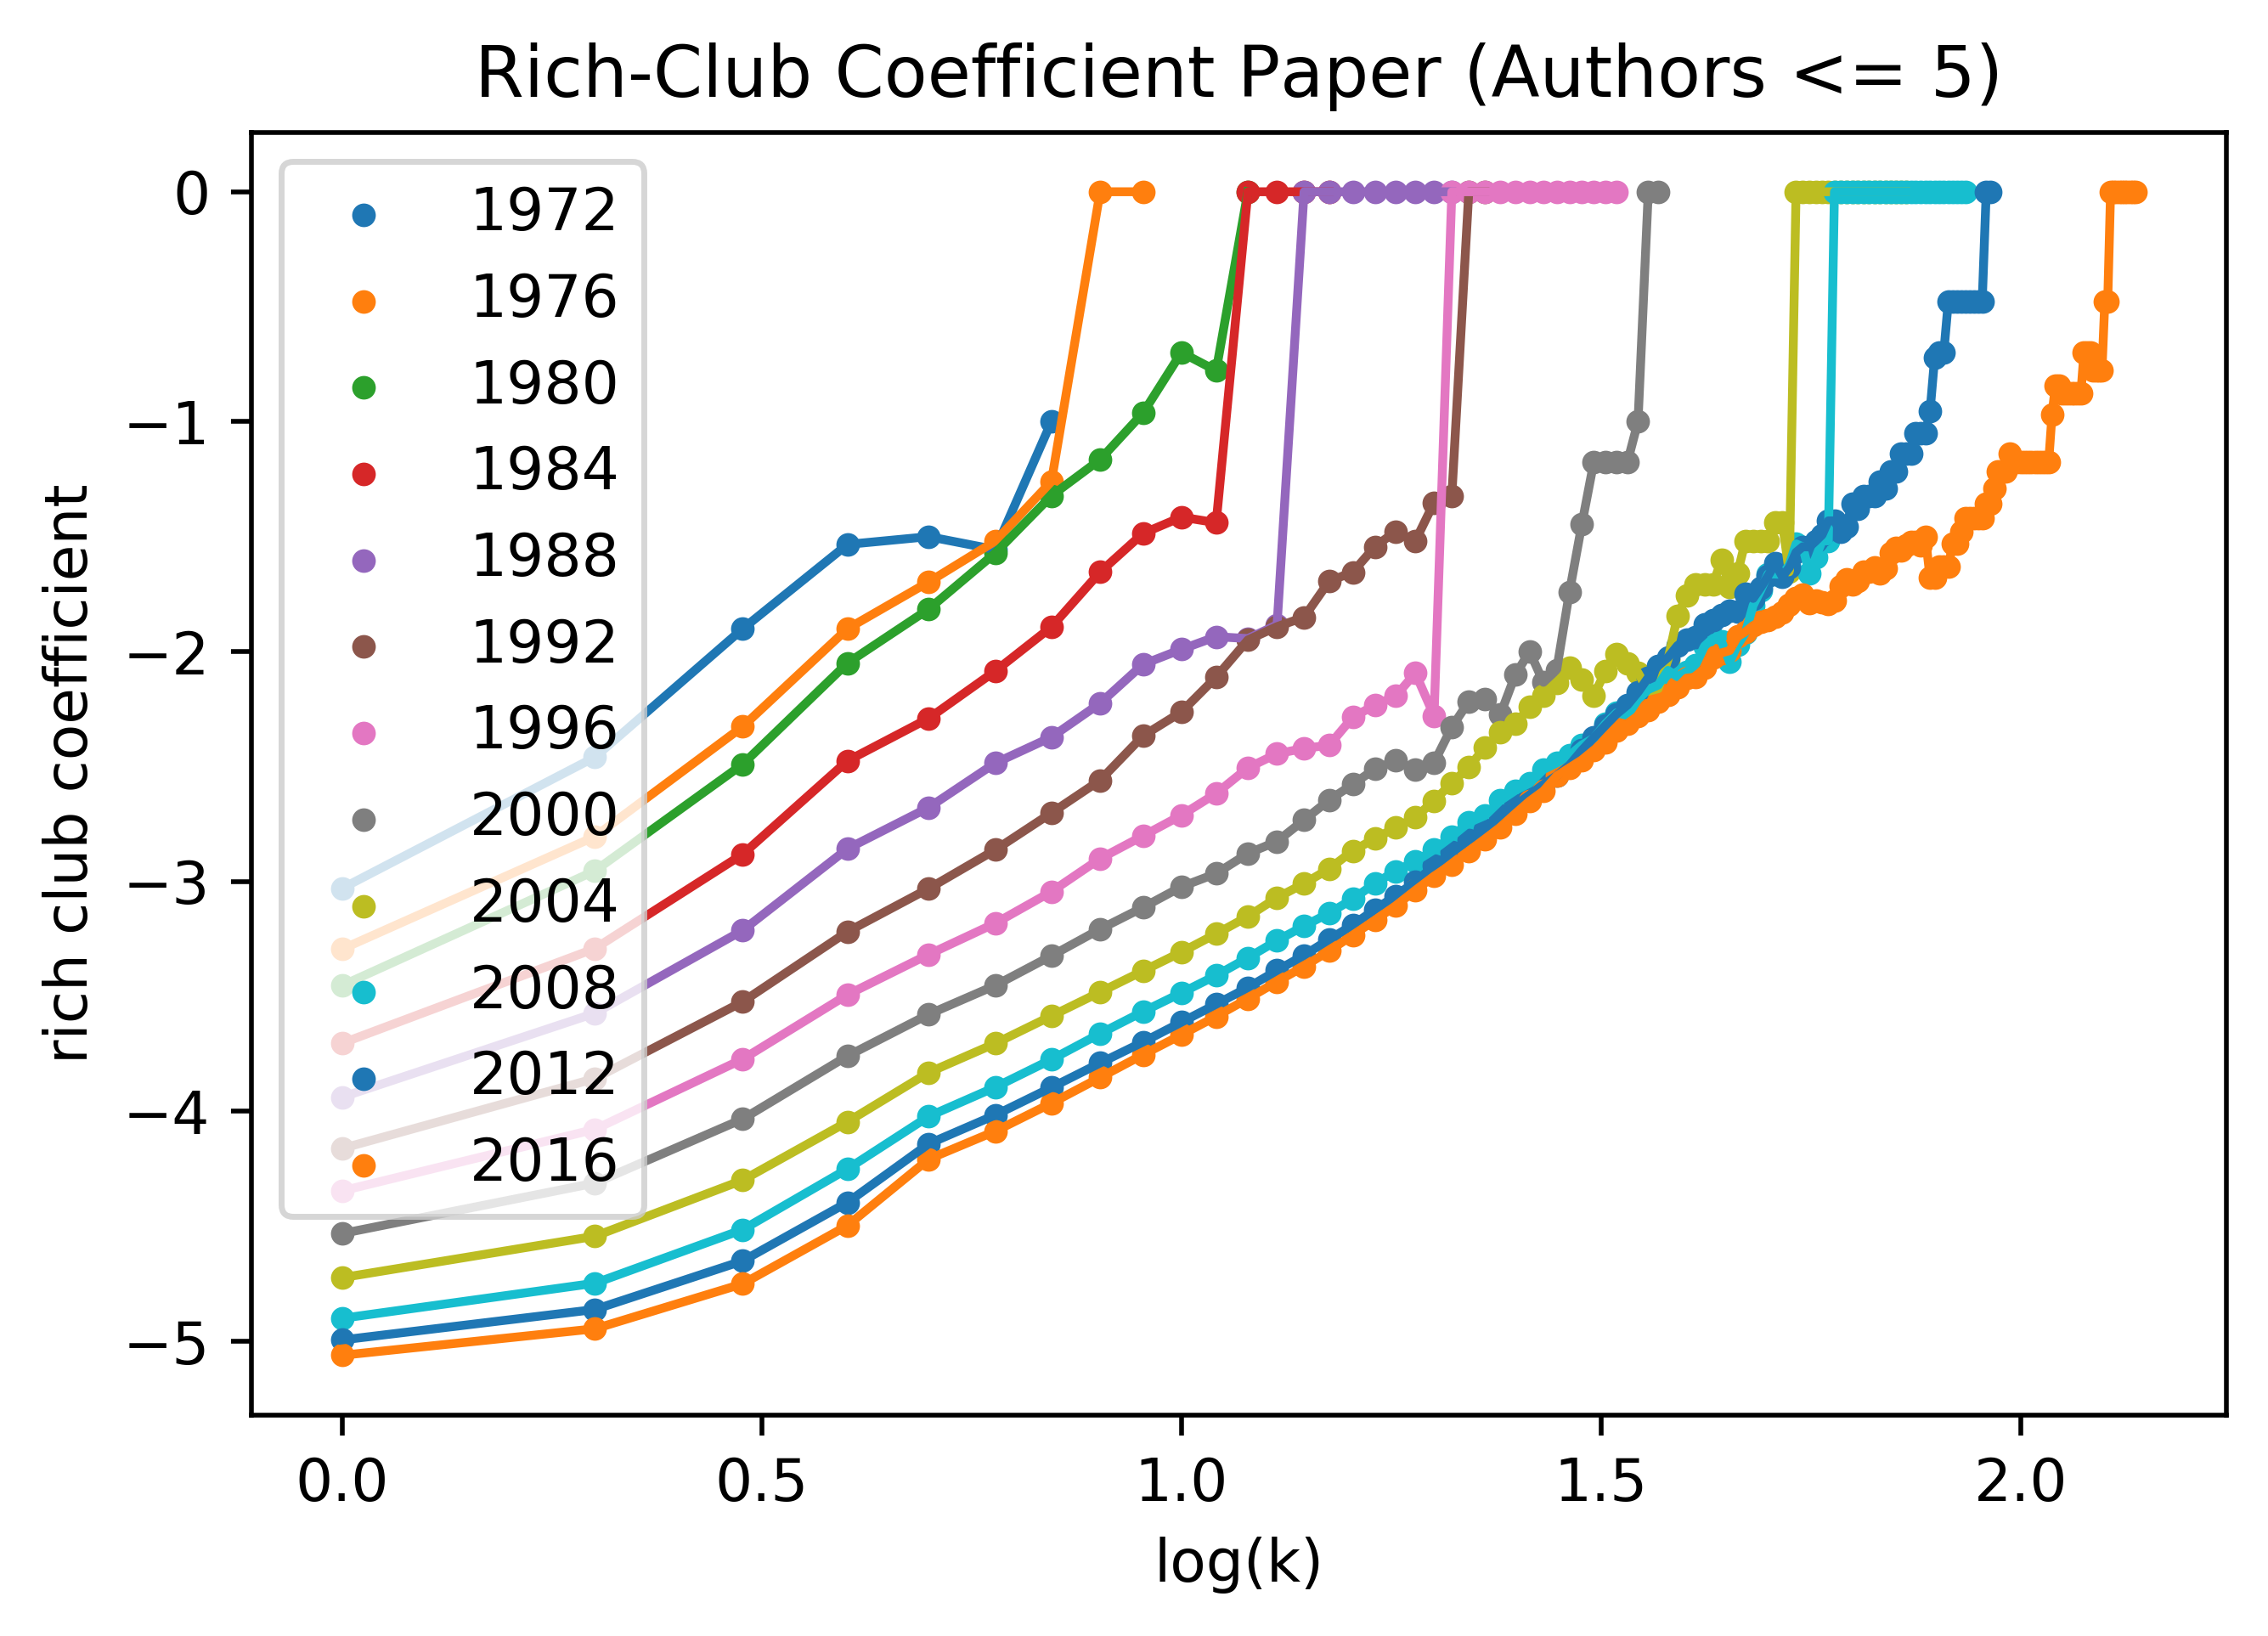

In [64]:
import time

begin = time.time()

fileDirctory = './Network Data/authors_5/'

plt.figure(dpi = 500)

for year in range(1970, 2018):
    if (year % 4):
        continue
    filePath = fileDirctory + str(year) + '.csv'
    rich_club_coefficient = get_rich_club_coefficient(filePath)
    rich_club_coefficient_list = []
    log_rich_club_coefficient_list = []
    for key in rich_club_coefficient:
#         rich_club_coefficient_list.append(rich_club_coefficient[key])
        if (rich_club_coefficient[key] == 0):
            log_rich_club_coefficient_list.append(0)
            continue
        log_rich_club_coefficient_list.append(log(rich_club_coefficient[key], 10))

    log_degree_list = []
    for k in range(1, len(log_rich_club_coefficient_list) + 1):
        log_degree_list.append(log(k, 10))
    
    plt.scatter(log_degree_list, 
                log_rich_club_coefficient_list, 
                label = str(year), 
                marker = '.')
    
    plt.plot(log_degree_list, log_rich_club_coefficient_list)
#     plt.xticks(log_degree_list, ['1.0E' + str(k) for k in log_degree_list])

plt.legend()
plt.title('Rich-Club Coefficient Paper (Authors <= 5)')
plt.xlabel('log(k)')
plt.ylabel('rich club coefficient')


print('time consumed: ', time.time() - begin)